In [1]:
#Experiment was run with a d430 Node.

import pandas as pd

df = pd.read_csv("./logs/combined.csv")
desiredCols = ["sleepdisable", "rate", "policy", "pkg_watts_avg", "pkg_watts_std", "ram_watts_avg", "ram_watts_std", "SourcenumRecordsOutPerSecond_avg", "SourcenumRecordsOutPerSecond_std"]
df = df[desiredCols]

# Filtering out rows that didn't meet the specified range.
df = df[df["SourcenumRecordsOutPerSecond_avg"] >= (0.95*df["rate"])]

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dfEnabled = df[df["sleepdisable"] == 0]
dfDisabled = df[df["sleepdisable"] == 1]

display(dfEnabled)

/tmp/ipykernel_500677/1254726247.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,sleepdisable,rate,policy,pkg_watts_avg,pkg_watts_std,ram_watts_avg,ram_watts_std,SourcenumRecordsOutPerSecond_avg,SourcenumRecordsOutPerSecond_std
0,0,100,ondemand,11.87,1.38,1.46,0.19,95.146224,13.720578
2,0,200,ondemand,14.07,1.18,1.82,0.18,199.987963,0.049630
4,0,300,ondemand,17.09,1.48,2.32,0.21,300.000000,0.000000
6,0,400,ondemand,20.46,0.87,2.98,0.12,400.000000,0.000000
8,0,500,ondemand,22.46,1.27,3.29,0.19,499.837963,0.082366
10,0,600,ondemand,24.66,1.18,3.58,0.17,599.283333,0.660270
12,0,700,ondemand,26.64,1.42,3.67,0.22,699.911111,0.118243
14,0,800,ondemand,28.95,1.28,4.24,0.20,799.209804,0.706623
16,0,900,ondemand,29.93,1.15,4.35,0.19,899.458333,0.805273
18,0,1000,ondemand,32.75,1.53,4.63,0.20,999.303922,1.438051


In [2]:
display(dfDisabled)

,sleepdisable,rate,policy,pkg_watts_avg,pkg_watts_std,ram_watts_avg,ram_watts_std,SourcenumRecordsOutPerSecond_avg,SourcenumRecordsOutPerSecond_std
1,1,100,ondemand,84.20,0.12,2.93,0.03,95.077157,14.123918
3,1,200,ondemand,84.87,0.11,3.21,0.04,200.000000,0.000000
5,1,300,ondemand,85.72,0.12,3.44,0.05,300.000000,0.000000
7,1,400,ondemand,86.14,0.29,3.66,0.11,399.539815,0.802430
9,1,500,ondemand,86.54,0.14,3.81,0.05,500.000000,0.000000
11,1,600,ondemand,86.83,0.47,4.07,0.18,599.998148,0.007635
13,1,700,ondemand,87.49,0.53,4.30,0.21,700.138235,0.623892
15,1,800,ondemand,88.15,0.37,4.49,0.15,800.000000,0.000000
17,1,900,ondemand,88.61,0.57,4.67,0.23,899.372222,0.685498
19,1,1000,ondemand,88.98,0.37,4.91,0.14,999.518519,0.588991


<Figure size 432x288 with 0 Axes>

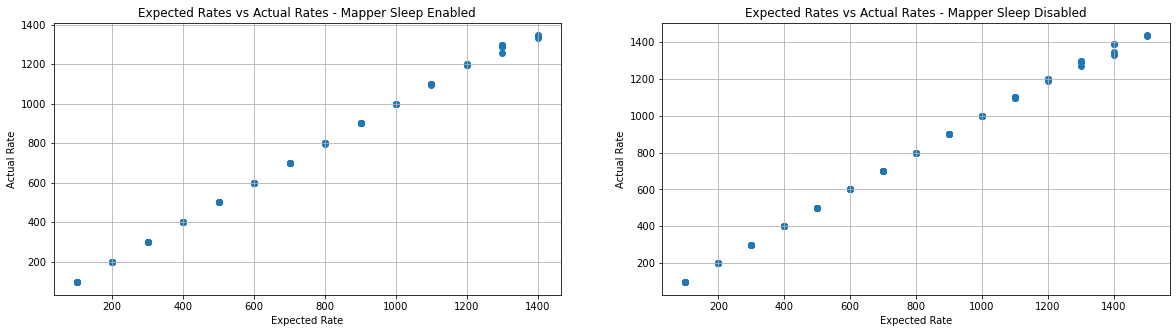

In [3]:
import matplotlib.pyplot as plt
plt.figure()

fig, plots = plt.subplots(1, 2, figsize=(20, 5))

plots[0].scatter(dfEnabled['rate'], dfEnabled['SourcenumRecordsOutPerSecond_avg'])
plots[0].set_xlabel("Expected Rate")
plots[0].set_ylabel("Actual Rate")
plots[0].set_title("Expected Rates vs Actual Rates - Mapper Sleep Enabled")
plots[0].grid(True)

plots[1].scatter(dfDisabled['rate'], dfDisabled['SourcenumRecordsOutPerSecond_avg'])
plots[1].set_xlabel("Expected Rate")
plots[1].set_ylabel("Actual Rate")
plots[1].set_title("Expected Rates vs Actual Rates - Mapper Sleep Disabled")
plots[1].grid(True)

plt.show()

<Figure size 432x288 with 0 Axes>

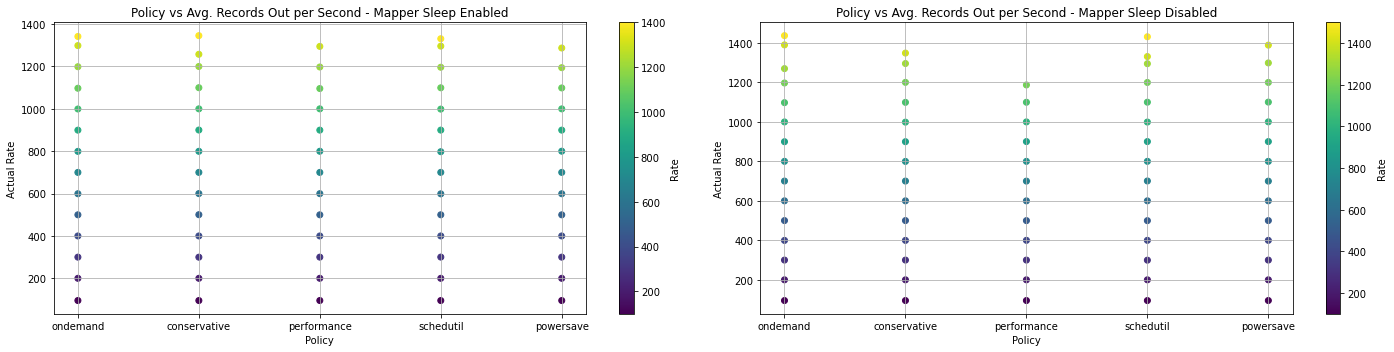

In [4]:
cmap = 'viridis'
plt.figure()
fig, plots = plt.subplots(1, 2, figsize=(20, 5))

scatter1 = plots[0].scatter(dfEnabled['policy'], dfEnabled['SourcenumRecordsOutPerSecond_avg'], c=dfEnabled['rate'], cmap=cmap)
plots[0].set_xlabel("Policy")
plots[0].set_ylabel("Actual Rate")
plots[0].set_title("Policy vs Avg. Records Out per Second - Mapper Sleep Enabled")
plots[0].grid(True)
plt.colorbar(scatter1, ax=plots[0], label='Rate')

scatter2 = plots[1].scatter(dfDisabled['policy'], dfDisabled['SourcenumRecordsOutPerSecond_avg'], c=dfDisabled['rate'], cmap=cmap)
plots[1].set_xlabel("Policy")
plots[1].set_ylabel("Actual Rate")
plots[1].set_title("Policy vs Avg. Records Out per Second - Mapper Sleep Disabled")
plots[1].grid(True)
plt.colorbar(scatter2, ax=plots[1], label='Rate')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

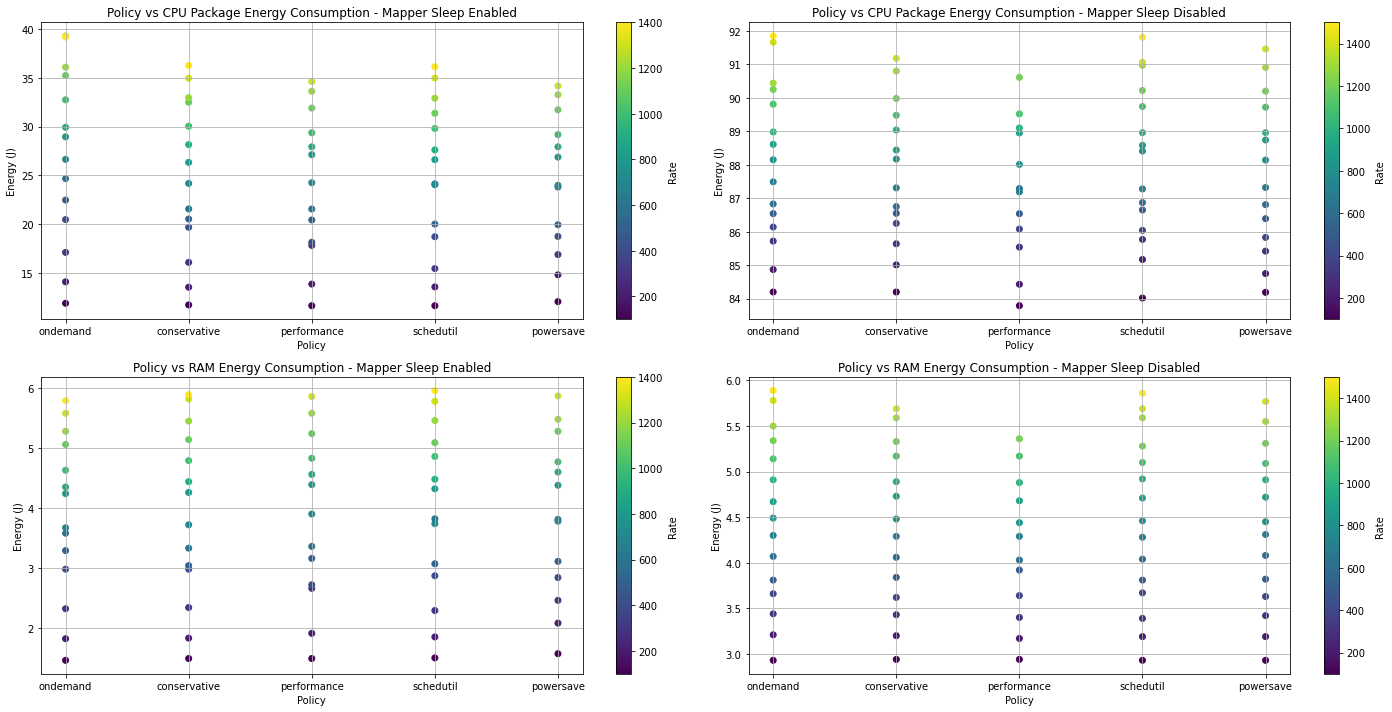

In [5]:
cmap = 'viridis'
plt.figure()
fig, plots = plt.subplots(2, 2, figsize=(20, 10))

scatter1 = plots[0][0].scatter(dfEnabled['policy'], dfEnabled['pkg_watts_avg'], c=dfEnabled['rate'], cmap=cmap)
plots[0][0].set_xlabel("Policy")
plots[0][0].set_ylabel("Energy (J)")
plots[0][0].set_title("Policy vs CPU Package Energy Consumption - Mapper Sleep Enabled")
plots[0][0].grid(True)
plt.colorbar(scatter1, ax=plots[0][0], label='Rate')

scatter2 = plots[0][1].scatter(dfDisabled['policy'], dfDisabled['pkg_watts_avg'], c=dfDisabled['rate'], cmap=cmap)
plots[0][1].set_xlabel("Policy")
plots[0][1].set_ylabel("Energy (J)")
plots[0][1].set_title("Policy vs CPU Package Energy Consumption - Mapper Sleep Disabled")
plots[0][1].grid(True)
plt.colorbar(scatter2, ax=plots[0][1], label='Rate')

scatter3 = plots[1][0].scatter(dfEnabled['policy'], dfEnabled['ram_watts_avg'], c=dfEnabled['rate'], cmap=cmap)
plots[1][0].set_xlabel("Policy")
plots[1][0].set_ylabel("Energy (J)")
plots[1][0].set_title("Policy vs RAM Energy Consumption - Mapper Sleep Enabled")
plots[1][0].grid(True)
plt.colorbar(scatter3, ax=plots[1][0], label='Rate')

scatter4 = plots[1][1].scatter(dfDisabled['policy'], dfDisabled['ram_watts_avg'], c=dfDisabled['rate'], cmap=cmap)
plots[1][1].set_xlabel("Policy")
plots[1][1].set_ylabel("Energy (J)")
plots[1][1].set_title("Policy vs RAM Energy Consumption - Mapper Sleep Disabled")
plots[1][1].grid(True)
plt.colorbar(scatter4, ax=plots[1][1], label='Rate')

plt.tight_layout()
plt.show()
